In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
from matplotlib import pyplot as plt

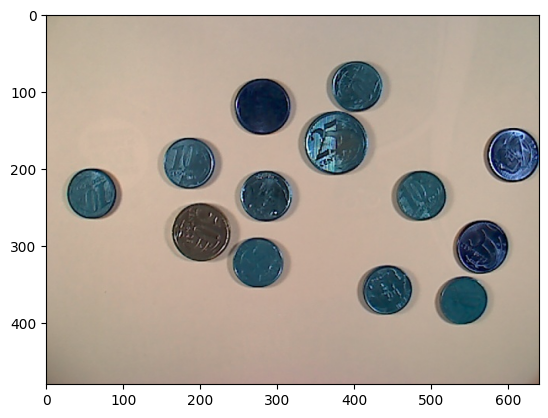

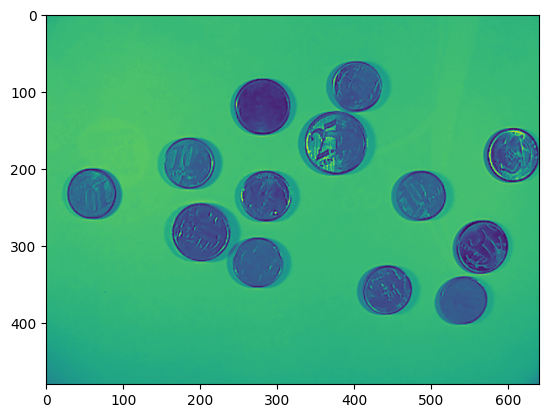

Total coins:14


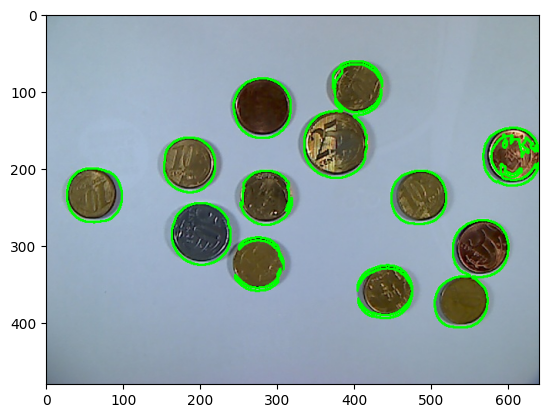

In [4]:
coin_image =cv2.imread('/content/drive/MyDrive/Projects/coins.jpg')
plt.imshow(coin_image)
plt.show()

gray_img = cv2.cvtColor(coin_image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img)
plt.show()

# to avoid noises change to blur
blur_image = cv2.GaussianBlur(gray_img,(5,5),0)
plt.imshow(blur_image, cmap='gray')

edges = cv2.Canny(blur_image,150,350,3)
plt.imshow(edges, cmap='gray')


dilate = cv2.dilate(edges,(1,1), iterations = 4)
plt.imshow(dilate, cmap='gray')


# finding the contour
(cnt,hierarchy) = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

rgb_ing = cv2.cvtColor(coin_image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb_ing,cnt,-1,(0,255,0),2)
plt.imshow(rgb_ing , cmap= 'gray')


In [5]:

print(f'Total coins:{len(cnt)}')

Total coins:14


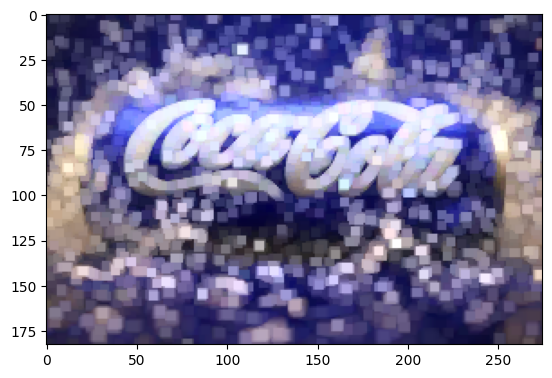

In [21]:
#dilation
import numpy as np

img = cv2.imread("/content/drive/MyDrive/Projects/coco.jpeg")

plt.imshow(img )

kernel = np.ones((5,5), np.uint8)
kernel
dilate = cv2.dilate(img,kernel, iterations = 1)
plt.imshow(dilate)


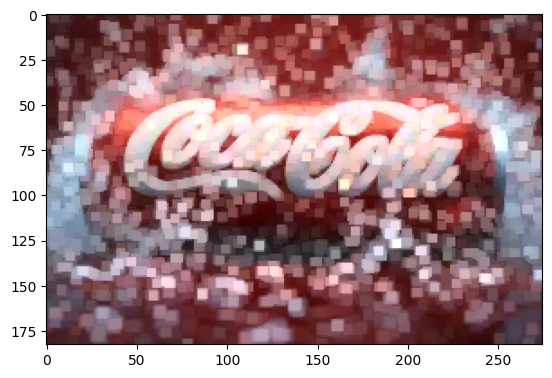

In [22]:
img_out = cv2.cvtColor(dilate, cv2.COLOR_BGR2RGB)

plt.imshow(img_out)


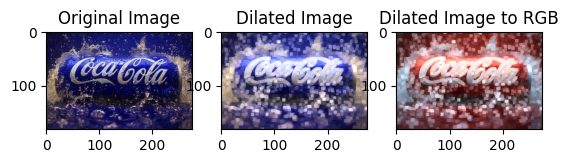

In [25]:
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img)

plt.subplot(1, 3, 2)
plt.title("Dilated Image")
plt.imshow(dilate)


plt.subplot(1, 3, 3)
plt.title("Dilated Image to RGB")
plt.imshow(img_out)

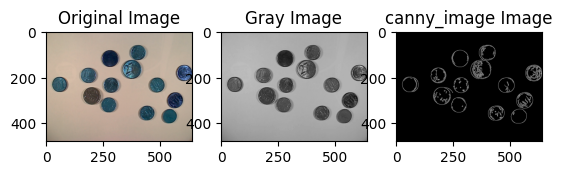

In [27]:
#Detect edges in a grayscale image using the Canny edge detector.

coin_image =cv2.imread('/content/drive/MyDrive/Projects/coins.jpg')
gray = cv2.cvtColor(coin_image,cv2.COLOR_BGR2GRAY)

canny_image = cv2.Canny(gray,100,500)

plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(coin_image)

plt.subplot(1,3,2)
plt.title("Gray Image")
plt.imshow(gray, cmap='gray')


plt.subplot(1,3,3)
plt.title("canny_image Image")
plt.imshow(canny_image, cmap='gray')

1


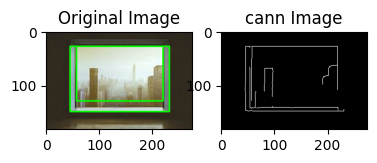

In [42]:
rect_img =cv2.imread('/content/drive/MyDrive/Projects/2.jpeg')
gray = cv2.cvtColor(rect_img,cv2.COLOR_BGR2GRAY)
bb = cv2.GaussianBlur(gray,(5,5),0 )
cann = cv2.Canny(bb,200,300)

contours,_ = cv2.findContours(cann,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
min_aspect_ratio = 1.2
max_aspect_ratio = 2.0
tt = 0
for cc in contours:
  x,y,w,h = cv2.boundingRect(cc)
  aspect_ratio = float(w)/h
  if aspect_ratio>=min_aspect_ratio and aspect_ratio<=max_aspect_ratio:
    tt =+1
    cv2.rectangle(rect_img,(x,y),(x+w,y+h),(0,255,0),2)




print(tt)
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(rect_img)

plt.subplot(1,3,2)
plt.title("cann Image")
plt.imshow(cann, cmap='gray')

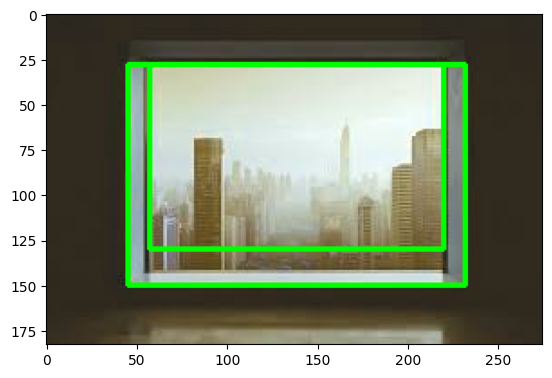

In [41]:
plt.imshow(rect_img, cmap ='gray')

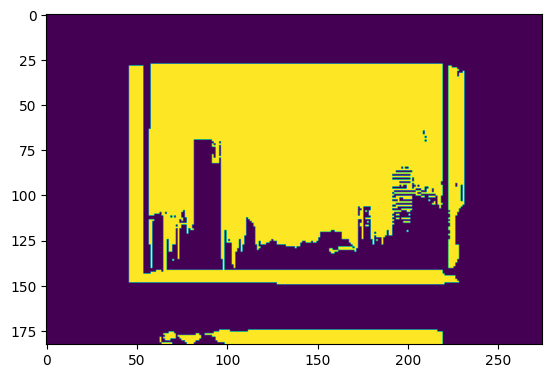

In [45]:
rect_img =cv2.imread('/content/drive/MyDrive/Projects/2.jpeg')
gray = cv2.cvtColor(rect_img,cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray,150,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(binary)

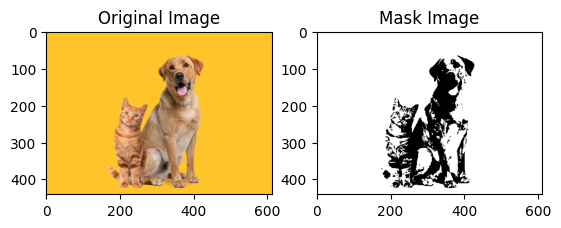

In [58]:
import numpy as np
img = cv2.imread('/content/drive/MyDrive/Projects/dog_cat.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

k=3

pixels = gray_img.reshape((-1,1))

criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,100,0.85)
_,label,center = cv2.kmeans(np.float32(pixels),k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

labels = label.reshape(gray_img.shape)


creating_mask = np.zeros_like(gray_img)
creating_mask[labels==np.argmax(center)]=255


plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img)

plt.subplot(1,2,2)
plt.title("Mask Image")
plt.imshow(creating_mask, cmap='gray')

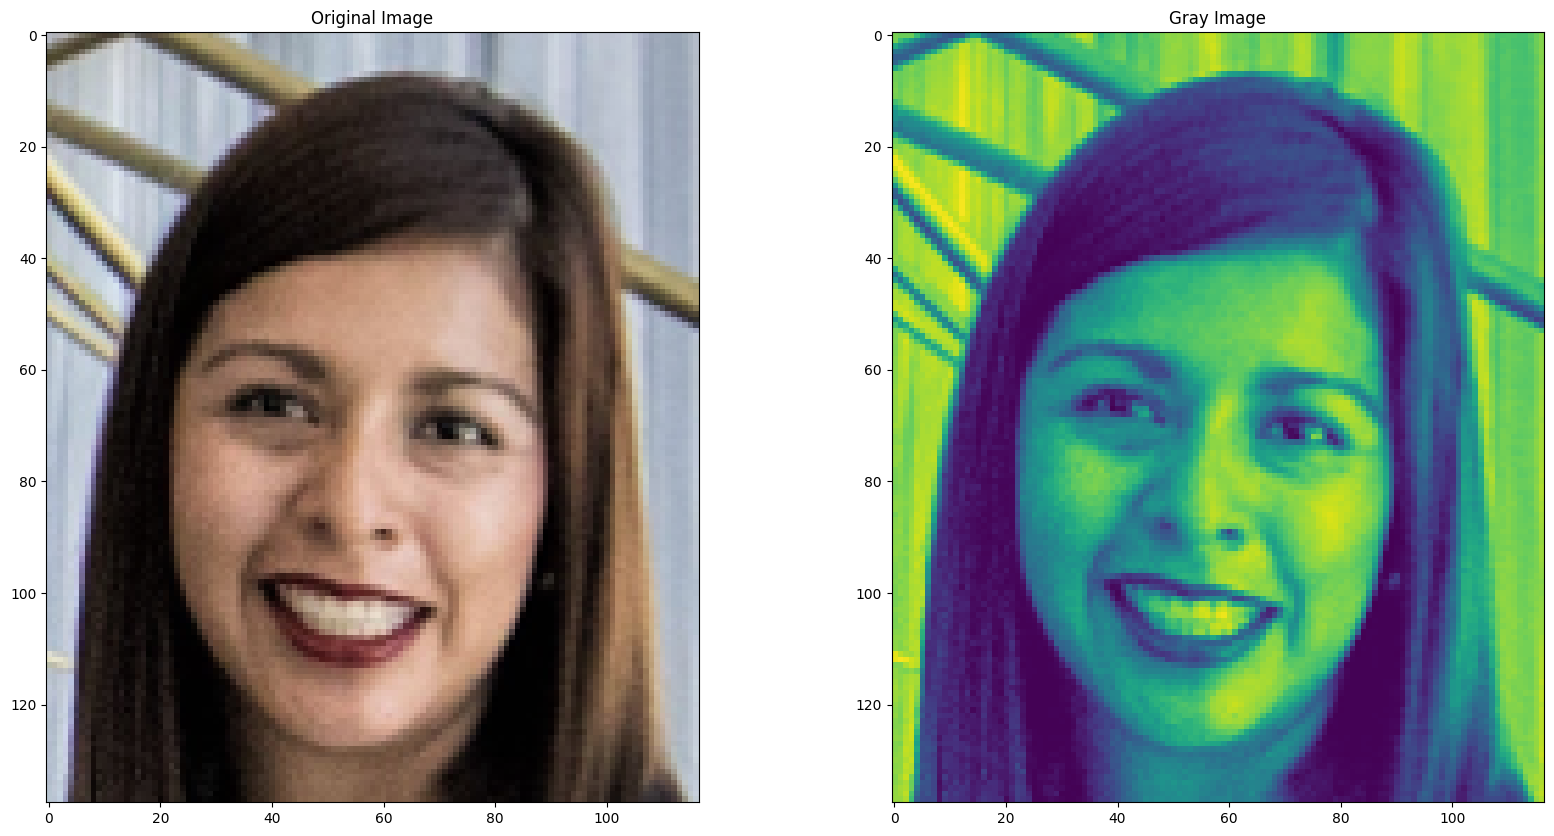

In [75]:
#feature Matching


face_img =cv2.imread('/content/drive/MyDrive/Projects/123.png')
face_rgb = cv2.cvtColor(face_img,cv2.COLOR_BGR2RGB)
face_gray = cv2.cvtColor(face_img,cv2.COLOR_BGR2GRAY)

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(face_rgb)
plt.subplot(1,2,2)
plt.title("Gray Image")
plt.imshow(face_gray)

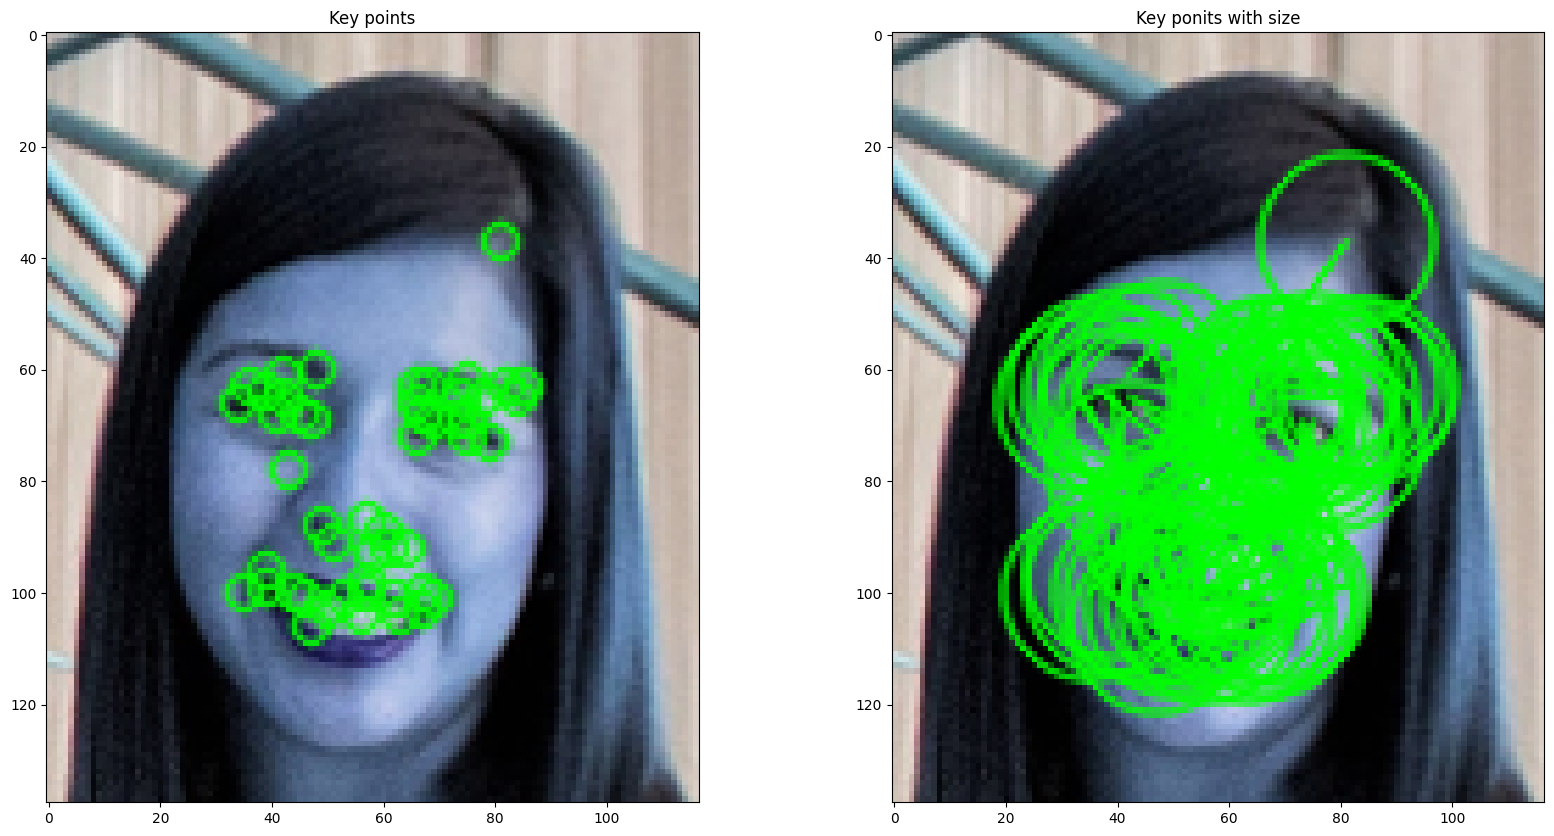

50


In [76]:
keypt =100
factor =2

orb = cv2.ORB_create(keypt,factor)
kp1,des1 = orb.detectAndCompute(face_gray,None)

kp_with_size = np.copy(face_img)
kp_without_size = np.copy(face_img)

cv2.drawKeypoints(face_img,kp1,kp_without_size,color=(0,255,0))
cv2.drawKeypoints(face_img,kp1,kp_with_size,color=(0,255,0),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
f, (ax1, ax2) = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [20,10]
ax1.set_title('Key points')
ax1.imshow(kp_without_size)
ax2.set_title('Key ponits with size')
ax2.imshow(kp_with_size)
plt.show()

print(len(kp1))

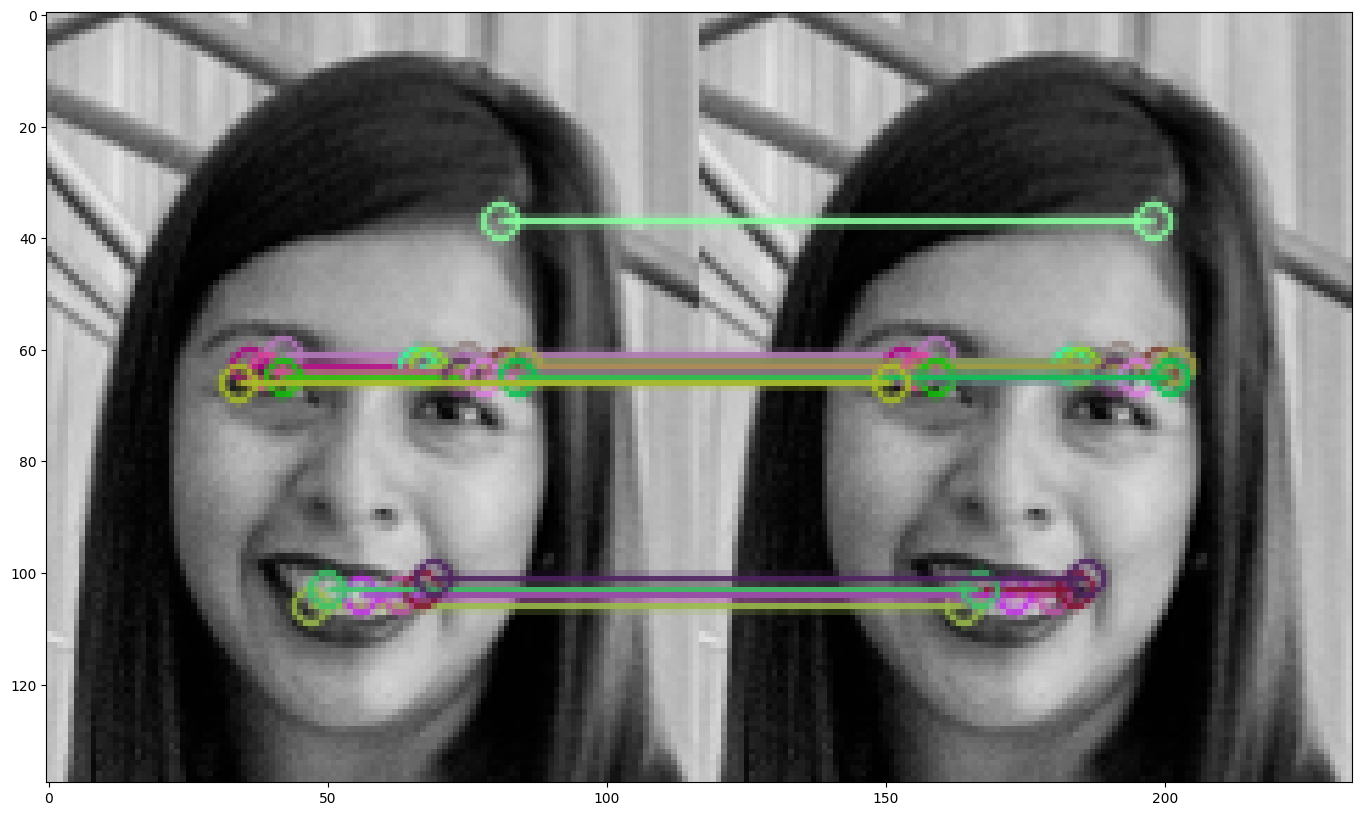

In [77]:
bf =cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
matches = bf.match(des1,des1)

matches = sorted(matches,key=lambda x:x.distance)
res = cv2.drawMatches(face_gray,kp1,face_gray,kp1,matches[:20],face_gray,flags=2)
plt.imshow(res)

In [78]:
with_boy = cv2.imread('/content/drive/MyDrive/Projects/12.jpeg')
with_girl = cv2.imread('/content/drive/MyDrive/Projects/three.jpeg')

with_boy = cv2.cvtColor(with_boy,cv2.COLOR_BGR2RGB)
with_girl = cv2.cvtColor(with_girl,cv2.COLOR_BGR2RGB)



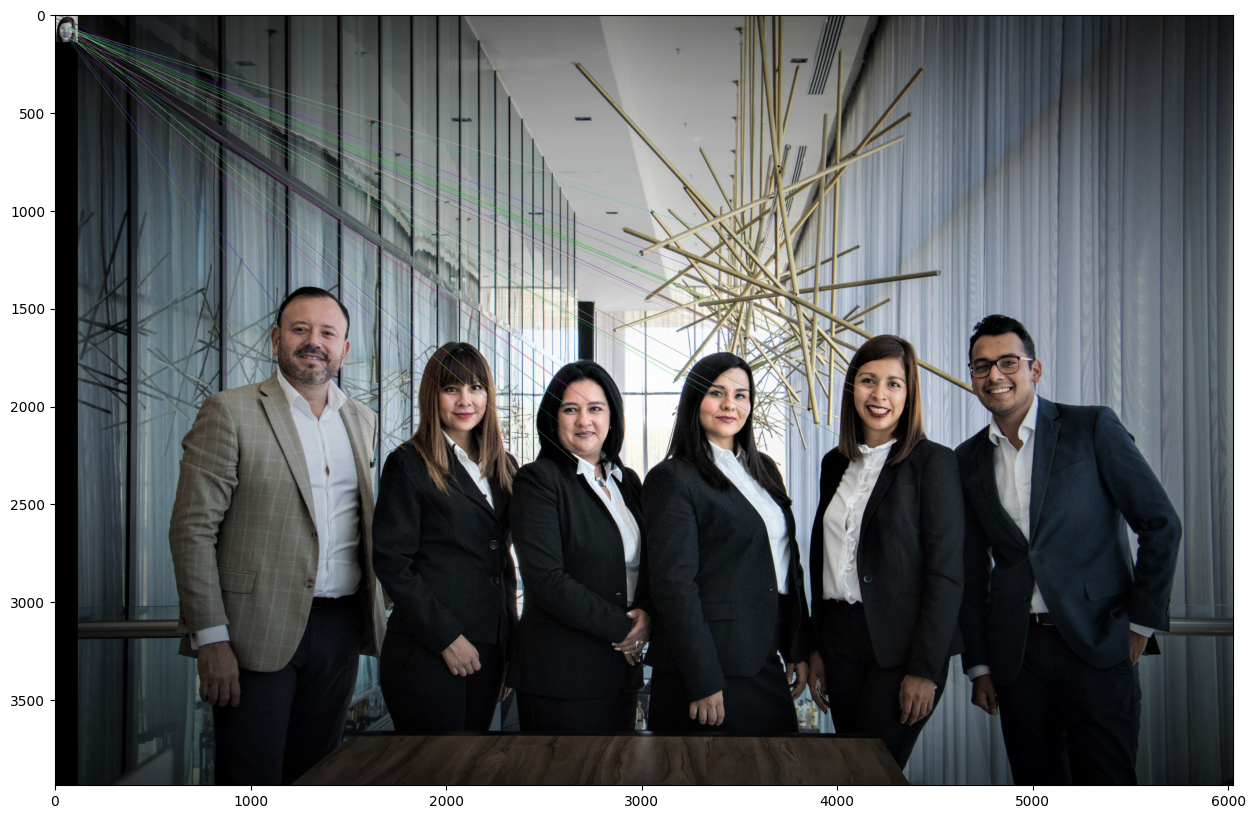

In [79]:
orb = cv2.ORB_create(1000,factor)

keypt1,desc1 = orb.detectAndCompute(with_boy,None)
keypt2,desc2 = orb.detectAndCompute(with_girl,None)


matches1 = bf.match(des1,desc1)
matches2 = bf.match(des1,desc2)



matches1 = sorted(matches1,key=lambda x:x.distance)
matches2 = sorted(matches2,key=lambda x:x.distance)

res1 = cv2.drawMatches(face_gray,kp1,with_boy,keypt1,matches1[:80],with_boy,flags=2)
res2 = cv2.drawMatches(face_gray,kp1,with_girl,keypt2,matches2[:10],with_girl,flags=2)

plt.imshow(res1)


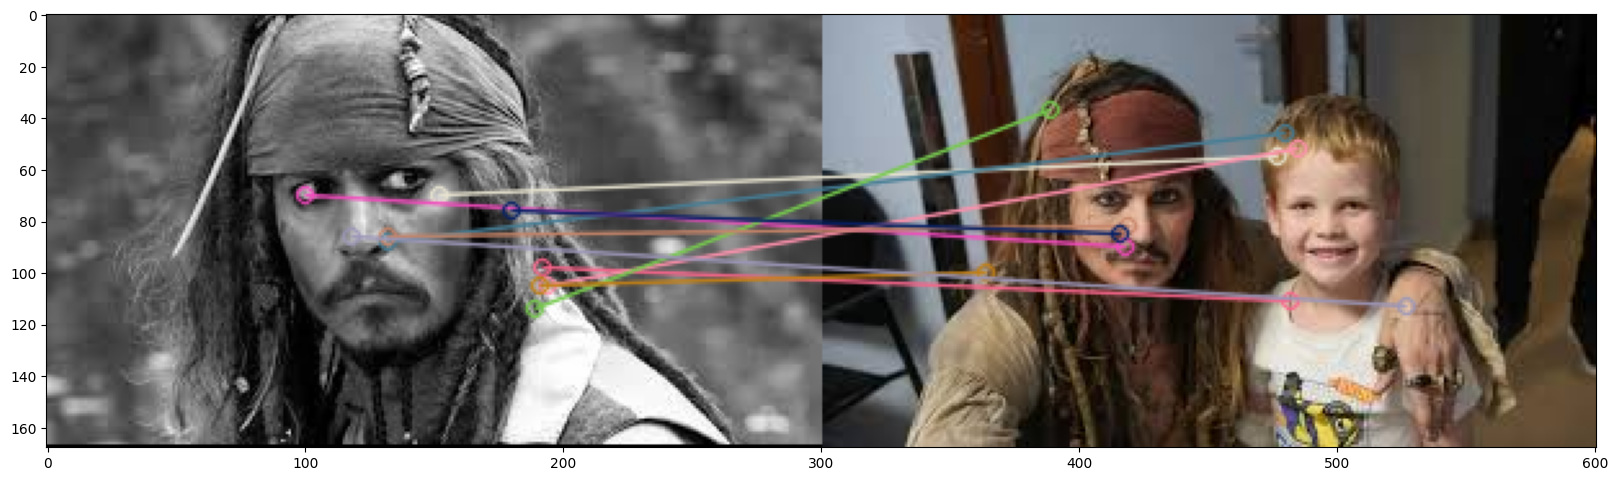

In [71]:
plt.imshow(res2)

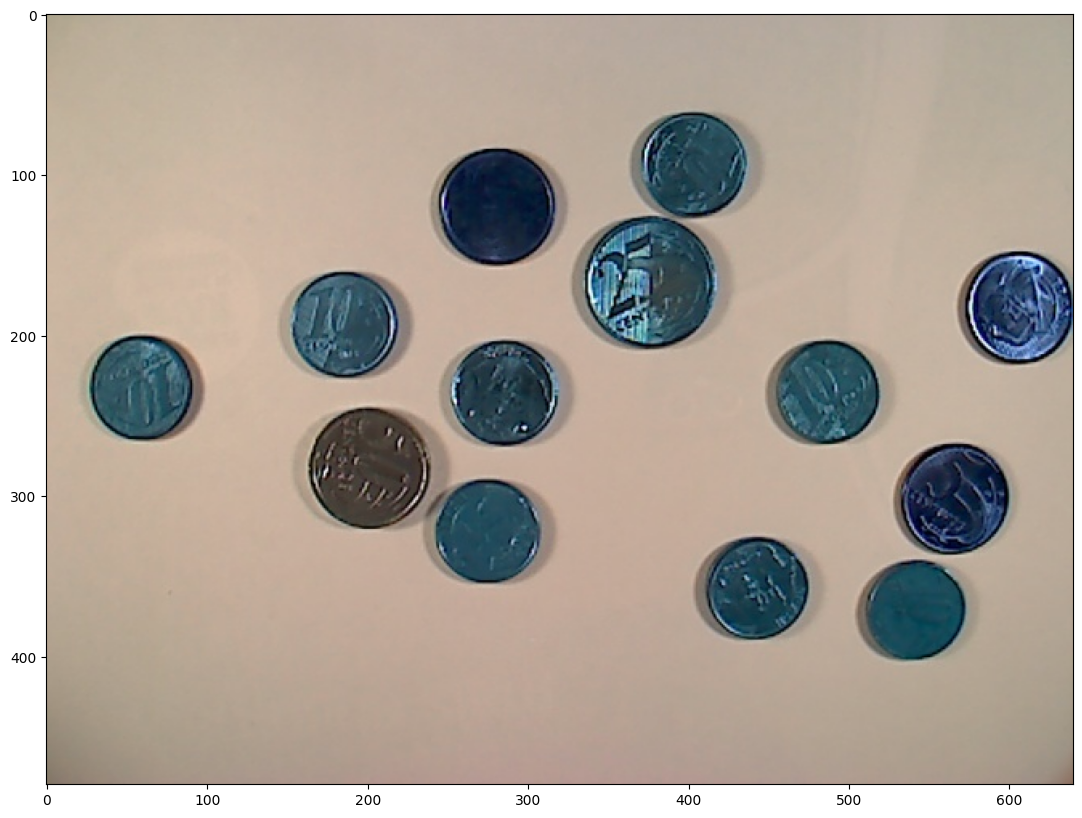

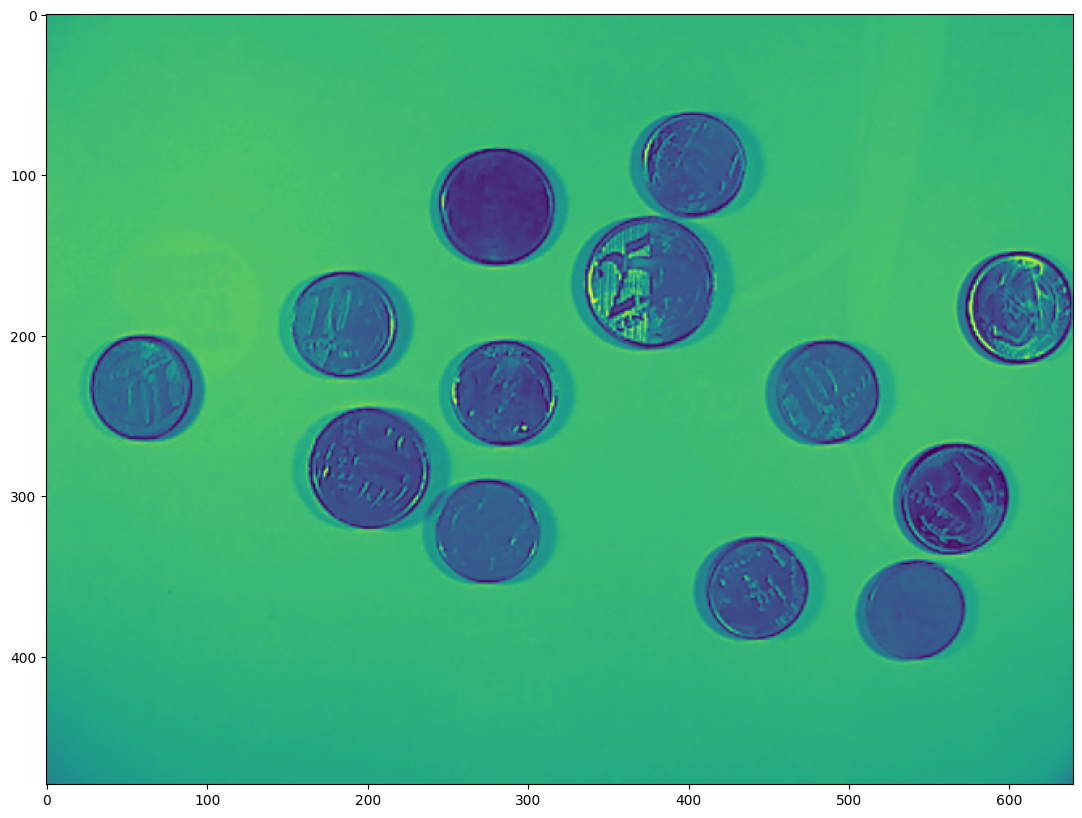

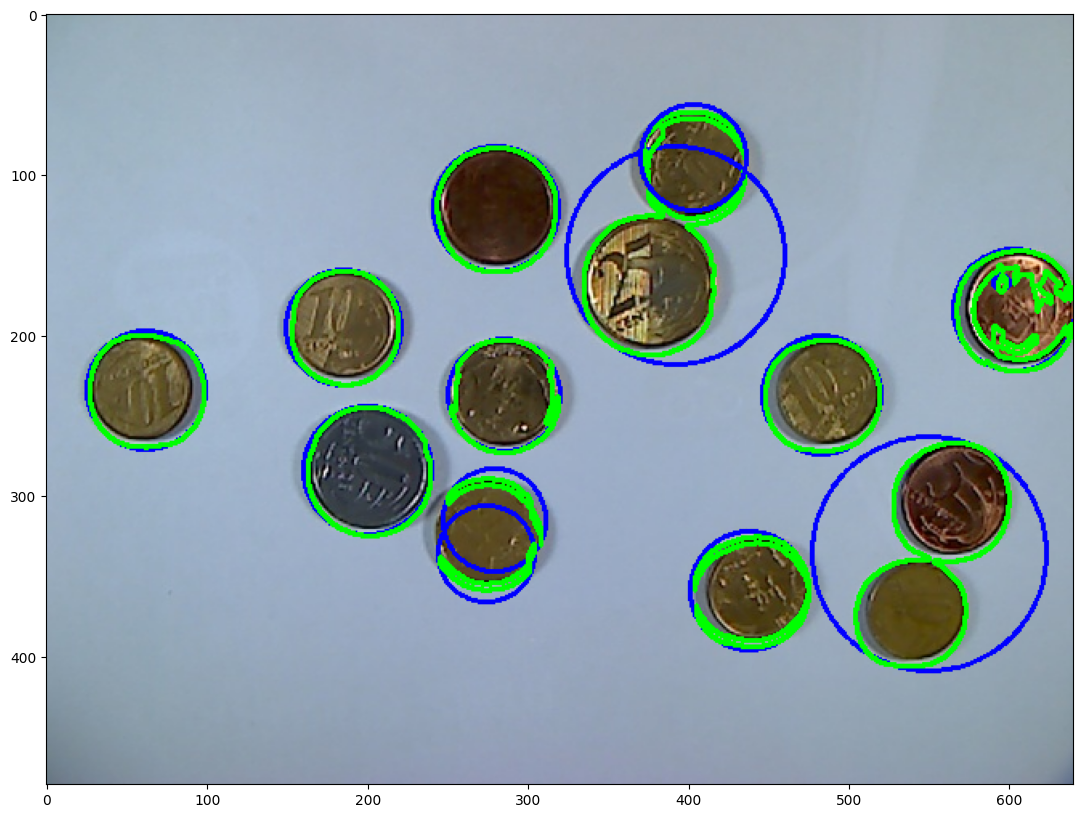

In [81]:
coin_image =cv2.imread('/content/drive/MyDrive/Projects/coins.jpg')
plt.imshow(coin_image)
plt.show()

gray_img = cv2.cvtColor(coin_image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img)
plt.show()

# to avoid noises change to blur
blur_image = cv2.GaussianBlur(gray_img,(5,5),0)
plt.imshow(blur_image, cmap='gray')

edges = cv2.Canny(blur_image,150,350,3)
plt.imshow(edges, cmap='gray')


dilate = cv2.dilate(edges,(1,1), iterations = 4)
plt.imshow(dilate, cmap='gray')


# finding the contour
(cnt,hierarchy) = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

rgb_ing = cv2.cvtColor(coin_image, cv2.COLOR_BGR2RGB)
for cc in cnt:
  x,y,w,h = cv2.boundingRect(cc)
  cv2.drawContours(rgb_ing,cnt,-1,(0,255,0),2)
  (x,y),radius = cv2.minEnclosingCircle(cc)
  center = (int(x),int(y))
  radius = (int(radius))
  cv2.circle(rgb_ing,center,radius,(0,0,255),2)

plt.imshow(rgb_ing , cmap= 'gray')
